In [128]:
import numpy as np
import pandas as pd
import scipy.io as sc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [129]:
#1. MIND READING DATASET

#STEP1: REDING THE DATA AND ASSIGNING TRAIN, TEST AND UNLABELED VARIABLES 
xtrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/trainingMatrix_MindReading1.mat")
ytrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/trainingLabels_MindReading_1.mat")
xt_test1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/testingMatrix_MindReading1.mat")
yt_test1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/testingLabels_MindReading1.mat")

xtrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/trainingMatrix_MindReading2.mat")
ytrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/trainingLabels_MindReading_2.mat")
xt_test2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/testingMatrix_MindReading2.mat")
yt_test2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/testingLabels_MindReading2.mat")

xtrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/trainingMatrix_MindReading3.mat")
ytrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/trainingLabels_MindReading_3.mat")
xt_test3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/testingMatrix_MindReading3.mat")
yt_test3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/testingLabels_MindReading3.mat")

unlabeled_xtrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/unlabeledMatrix_MindReading1.mat")
unlabeled_ytrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/unlabeledLabels_MindReading_1.mat")

unlabeled_xtrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/unlabeledMatrix_MindReading2.mat")
unlabeled_ytrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/unlabeledLabels_MindReading_2.mat")

unlabeled_xtrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/unlabeledMatrix_MindReading3.mat")
unlabeled_ytrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MindReading/unlabeledLabels_MindReading_3.mat")


x1=xtrain1['trainingMatrix']
y1=ytrain1['trainingLabels']
xt1=xt_test1['testingMatrix']
yt1=yt_test1['testingLabels']
unlabeled_x1=unlabeled_xtrain1['unlabeledMatrix']
unlabeled_y1=unlabeled_ytrain1['unlabeledLabels']

x2=xtrain2['trainingMatrix']
y2=ytrain2['trainingLabels']
xt2=xt_test2['testingMatrix']
yt2=yt_test2['testingLabels']
unlabeled_x2=unlabeled_xtrain2['unlabeledMatrix']
unlabeled_y2=unlabeled_ytrain2['unlabeledLabels']

x3=xtrain3['trainingMatrix']
y3=ytrain3['trainingLabels']
xt3=xt_test3['testingMatrix']
yt3=yt_test3['testingLabels']
unlabeled_x3=unlabeled_xtrain3['unlabeledMatrix']
unlabeled_y3=unlabeled_ytrain3['unlabeledLabels']

In [130]:
#2. STEP2: CONVERTING THE LABELS FROM A COLUMN VECTOR TO 1-D ARRAY and CREATING LIST TO CONCATENATE ALL THE 3 DATASETS INTO 1 LIST

y1=y1.ravel()
y2=y2.ravel()
y3=y3.ravel()

x_comp=[x1,x2,x3]
xt_comp=[xt1,xt2,xt3]
y_comp=[y1,y2,y3]
yt_comp=[yt1,yt2,yt3]
print(len(yt_comp[0]))
unlabeled_xcomp=[unlabeled_x1,unlabeled_x2,unlabeled_x3]
unlabeled_ycomp=[unlabeled_y1,unlabeled_y2,unlabeled_y3]

1511


In [131]:
#4. STEP4. MAIN LOGIC FOR THE RANDOM SAMPLING

model=LogisticRegression(solver='liblinear')
ypred_comp=[]
accuracy=[[],[],[]]
N,k=50,10
for j in range(len(x_comp)):
    accuracy_dataj=[]
    x=x_comp[j]
    y=y_comp[j]
    xt=xt_comp[j]
    yt=yt_comp[j]
    un_x=unlabeled_xcomp[j]
    un_y=unlabeled_ycomp[j]

    scaler1 = StandardScaler()
    scaler1.fit_transform(x)
    scaler1.transform(xt)
    scaler1.transform(un_x)
    
    # model.fit(x,y)
    # ypred=model.predict(xt)
    # acc=accuracy_score(y,ypred)
    for i in range(N):
        
        shuffled_indices = np.arange(len(un_x))
        np.random.shuffle(shuffled_indices)
        random_indices = shuffled_indices[:k]

        subset_ux=un_x[random_indices]
        subset_uy=un_y[random_indices]
        
        x=np.concatenate((x,subset_ux),axis=0)
        y=np.append(y,subset_uy)
        un_x=np.delete(un_x,random_indices,axis=0)
        un_y=np.delete(un_y,random_indices)
        model.fit(x,y)
        ypred=model.predict(xt)
        acc=accuracy_score(yt,ypred)
        accuracy_dataj.append(acc)

        # x=np.concatenate((x,subset_ux),axis=0)
        # y=np.append(y,subset_uy)
        
    accuracy[j]=accuracy_dataj
all_3_acc=np.array(accuracy)
Random_accuracy=np.mean(all_3_acc,axis=0)
        


In [132]:
#5. STEP5. MAIN LOGIC FOR THE ENTROPY BASED SAMPLING
#PLEASE NOTE HERE IM NOT READING THE INPUT AGAIN. BEFORE RUNNING THIS CELL PLEASE RUN CELLS WITH STEPS 1,2,3


x1=xtrain1['trainingMatrix']
y1=ytrain1['trainingLabels']
xt1=xt_test1['testingMatrix']
yt1=yt_test1['testingLabels']
unlabeled_x1=unlabeled_xtrain1['unlabeledMatrix']
unlabeled_y1=unlabeled_ytrain1['unlabeledLabels']

x2=xtrain2['trainingMatrix']
y2=ytrain2['trainingLabels']
xt2=xt_test2['testingMatrix']
yt2=yt_test2['testingLabels']
unlabeled_x2=unlabeled_xtrain2['unlabeledMatrix']
unlabeled_y2=unlabeled_ytrain2['unlabeledLabels']

x3=xtrain3['trainingMatrix']
y3=ytrain3['trainingLabels']
xt3=xt_test3['testingMatrix']
yt3=yt_test3['testingLabels']
unlabeled_x3=unlabeled_xtrain3['unlabeledMatrix']
unlabeled_y3=unlabeled_ytrain3['unlabeledLabels']

y1=y1.ravel()
y2=y2.ravel()
y3=y3.ravel()

x_comp=[x1,x2,x3]
xt_comp=[xt1,xt2,xt3]
y_comp=[y1,y2,y3]
yt_comp=[yt1,yt2,yt3]
print(len(yt_comp[0]))
unlabeled_xcomp=[unlabeled_x1,unlabeled_x2,unlabeled_x3]
unlabeled_ycomp=[unlabeled_y1,unlabeled_y2,unlabeled_y3]

model=LogisticRegression(solver='liblinear')
ypred_comp=[]
eaccuracy=[[],[],[]]
N,k=50,10
for j in range(len(x_comp)):
    accuracy_dataj=[]
    x=x_comp[j]
    y=y_comp[j]
    xt=xt_comp[j]
    yt=yt_comp[j]
    un_x=unlabeled_xcomp[j]
    un_y=unlabeled_ycomp[j]
    scaler1 = StandardScaler()
    scaler1.fit_transform(x)
    scaler1.transform(xt)
    scaler1.transform(un_x)
    
    model.fit(x,y)
    # ypred=model.predict(xt)
    # acc=accuracy_score(y,ypred)
    for i in range(N):
        
        Probs=model.predict_proba(un_x)
        entropies=-1*(np.sum(Probs*np.log(Probs),axis=1))

        sorted_indices=np.argsort(entropies)[-10:]
        
        subset_ux=(un_x[sorted_indices])
        un_x=np.delete(un_x,sorted_indices,axis=0)
        subset_uy=(un_y[sorted_indices])
        un_y=np.delete(un_y,sorted_indices,axis=0)
        
        x=np.concatenate((x,subset_ux),axis=0)
        y=np.append(y,subset_uy)
        
        model.fit(x,y)
        ypred=model.predict(xt)
        acc=accuracy_score(yt,ypred)
        accuracy_dataj.append(acc)

        # x=np.concatenate((x,subset_ux),axis=0)
        # y=np.append(y,subset_uy)
        
    eaccuracy[j]=accuracy_dataj
all_3_acc=np.array(eaccuracy)
Entropy_accuracy=np.mean(all_3_acc,axis=0)


1511


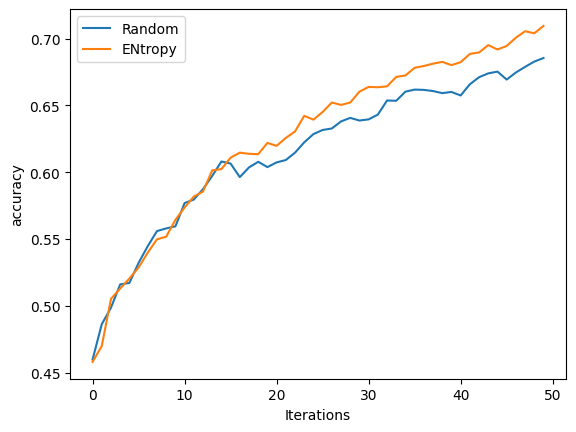

In [133]:
#Step6. PLOTS

plt.figure()
plt.plot(range(50),Random_accuracy,label="Random") 
plt.plot(range(50),Entropy_accuracy,label="ENtropy") 
plt.xlabel("Iterations")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [134]:
# II DATASET: MMI

In [135]:
#1. STEP1: READING THE DATA
xtrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/trainingMatrix_1.mat")
ytrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/trainingLabels_1.mat")
xt_test1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/testingMatrix_1.mat")
yt_test1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/testingLabels_1.mat")

xtrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/trainingMatrix_2.mat")
ytrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/trainingLabels_2.mat")
xt_test2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/testingMatrix_2.mat")
yt_test2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/testingLabels_2.mat")

xtrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/trainingMatrix_3.mat")
ytrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/trainingLabels_3.mat")
xt_test3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/testingMatrix_3.mat")
yt_test3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/testingLabels_3.mat")

unlabeled_xtrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/unlabeledMatrix_1.mat")
unlabeled_ytrain1=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/unlabeledLabels_1.mat")

unlabeled_xtrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/unlabeledMatrix_2.mat")
unlabeled_ytrain2=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/unlabeledLabels_2.mat")

unlabeled_xtrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/unlabeledMatrix_3.mat")
unlabeled_ytrain3=sc.loadmat("/Users/ushakiranmayee/Documents/DataMining/Assignments/Assignment 3/Data for Assignment 3/MMI/unlabeledLabels_3.mat")


x1=xtrain1['trainingMatrix']
y1=ytrain1['trainingLabels']
xt1=xt_test1['testingMatrix']
yt1=yt_test1['testingLabels']
unlabeled_x1=unlabeled_xtrain1['unlabeledMatrix']
unlabeled_y1=unlabeled_ytrain1['unlabeledLabels']

x2=xtrain2['trainingMatrix']
y2=ytrain2['trainingLabels']
xt2=xt_test2['testingMatrix']
yt2=yt_test2['testingLabels']
unlabeled_x2=unlabeled_xtrain2['unlabeledMatrix']
unlabeled_y2=unlabeled_ytrain2['unlabeledLabels']

x3=xtrain3['trainingMatrix']
y3=ytrain3['trainingLabels']
xt3=xt_test3['testingMatrix']
yt3=yt_test3['testingLabels']
unlabeled_x3=unlabeled_xtrain3['unlabeledMatrix']
unlabeled_y3=unlabeled_ytrain3['unlabeledLabels']

In [136]:
#2. STEP2: CREATING LIST TO CONCATENATE ALL THE 3 DATASETS, STANDARDIZING THE DATA, CONVERTING THE LABELS FROM A COLUMN VECTOR TO 1-D ARRAY

scaler1 = StandardScaler()
x_comp=[scaler1.fit_transform(i) for i in x_comp]
xt_comp=[scaler1.transform(i) for i in xt_comp]
unlabeled_xcomp=[scaler1.transform(i) for i in unlabeled_xcomp]
print(len(xt_comp[1]))

y1=y1.ravel()
y2=y2.ravel()
y3=y3.ravel()

x_comp=[x1,x2,x3]
xt_comp=[xt1,xt2,xt3]
y_comp=[y1,y2,y3]
yt_comp=[yt1,yt2,yt3]
print(len(yt_comp[0]))
unlabeled_xcomp=[unlabeled_x1,unlabeled_x2,unlabeled_x3]
unlabeled_ycomp=[unlabeled_y1,unlabeled_y2,unlabeled_y3]

1511
1785


In [137]:
#3. STEP3: MAIN LOGIC FOR RANDOM BASED SAMPLING

model=LogisticRegression(solver='liblinear')
ypred_comp=[]
accuracy=[]
N,k=50,10
for j in range(len(x_comp)):
    accuracy_dataj=[]
    x=x_comp[j]
    y=y_comp[j]
    xt=xt_comp[j]
    yt=yt_comp[j]
    un_x=unlabeled_xcomp[j]
    un_y=unlabeled_ycomp[j]

    scaler1 = StandardScaler()
    scaler1.fit_transform(x)
    scaler1.transform(xt)
    scaler1.transform(un_x)
    
    model.fit(x,y)
    ypred=model.predict(xt)
    # acc=accuracy_score(y,ypred)
    for i in range(N):
        
        shuffled_indices = np.arange(len(un_x))
        np.random.shuffle(shuffled_indices)
        random_indices = shuffled_indices[:k]

        subset_ux=un_x[random_indices]
        subset_uy=un_y[random_indices]
        
        x=np.concatenate((x,subset_ux),axis=0)
        y=np.append(y,subset_uy)
        un_x=np.delete(un_x,random_indices,axis=0)
        un_y=np.delete(un_y,random_indices)
        model.fit(x,y)
        ypred=model.predict(xt)
        acc=accuracy_score(yt,ypred)
        accuracy_dataj.append(acc)

        # x=np.concatenate((x,subset_ux),axis=0)
        # y=np.append(y,subset_uy)
        
    accuracy.append(accuracy_dataj)
all_3_acc=np.array(accuracy)
Random_accuracy=np.mean(all_3_acc,axis=0)
        


In [138]:
#3. STEP4: MAIN LOGIC FOR ENTROPY BASED SAMPLING


model=LogisticRegression(solver='liblinear')
ypred_comp=[]
eaccuracy=[[],[],[]]
N,k=50,10
for j in range(len(x_comp)):
    accuracy_dataj=[]
    x=x_comp[j]
    y=y_comp[j]
    xt=xt_comp[j]
    yt=yt_comp[j]
    un_x=unlabeled_xcomp[j]
    un_y=unlabeled_ycomp[j]
    scaler1 = StandardScaler()
    scaler1.fit_transform(x)
    scaler1.transform(xt)
    scaler1.transform(un_x)
    
    model.fit(x,y)
    # ypred=model.predict(xt)
    # acc=accuracy_score(y,ypred)
    for i in range(N):
        
        Probs=model.predict_proba(un_x)
        entropies=-1*(np.sum(Probs*np.log2(Probs),axis=1))

        sorted_indices=np.argsort(entropies)[-10:]
        
        subset_ux=(un_x[sorted_indices])
        un_x=np.delete(un_x,sorted_indices,axis=0)
        subset_uy=(un_y[sorted_indices])
        un_y=np.delete(un_y,sorted_indices)
        
        x=np.concatenate((x,subset_ux),axis=0)
        y=np.append(y,subset_uy)
        
        model.fit(x,y)
        ypred=model.predict(xt)
        acc=accuracy_score(yt,ypred)
        accuracy_dataj.append(acc)

        # x=np.concatenate((x,subset_ux),axis=0)
        # y=np.append(y,subset_uy)
        
    eaccuracy[j]=accuracy_dataj
all_3_acc=np.array(eaccuracy)
Entropy_accuracy=np.mean(all_3_acc,axis=0)


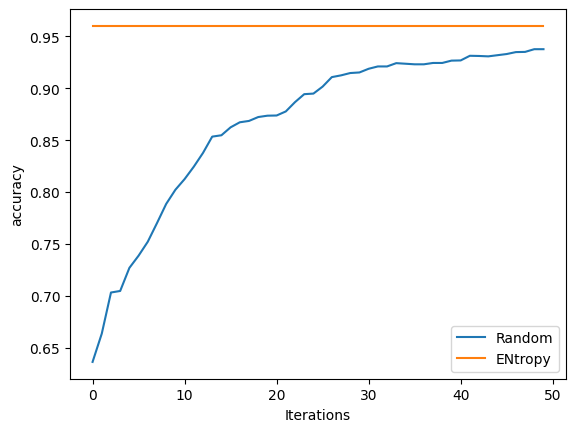

In [139]:
#Step6. PLOTS

plt.figure()
plt.plot(range(50),Random_accuracy,label="Random") 
plt.plot(range(50),Entropy_accuracy,label="ENtropy") 
plt.xlabel("Iterations")
plt.ylabel("accuracy")
plt.legend()
plt.show()